In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,972 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,241 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,773 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugi

In [3]:
from google.colab import drive
drive.mount('/content/drive')# Load saved data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-theta.npz", allow_pickle=True)
all_theta = data["all_theta"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-gamma.npz", allow_pickle=True)
all_gamma = data["all_gamma"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-z.npz", allow_pickle=True)
all_z = data["all_z"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-noise.npz", allow_pickle=True)
all_noise = data["all_noise"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-received-signal.npz", allow_pickle=True)
all_received_signal = data["all_received_signal"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

Mounted at /content/drive


<Figure size 640x480 with 0 Axes>

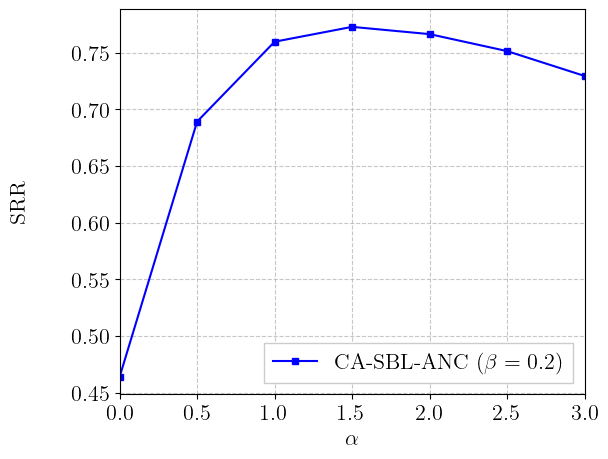

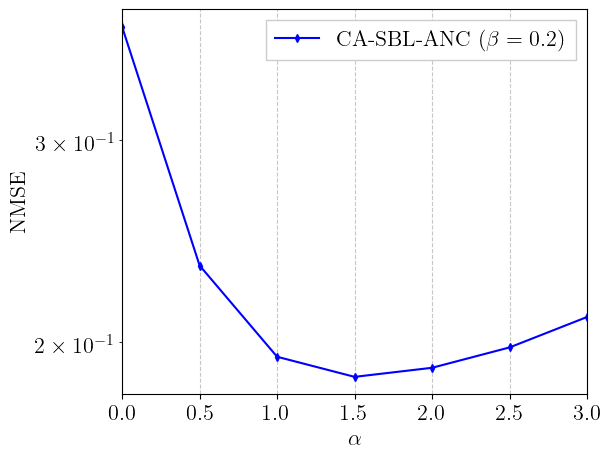

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-100-sbl-pilot-length-all-snr-db-12.npz", allow_pickle=True)

#sbl_avg_hit_rate = data["avg_hit_rate_sbl"][1]
#sbl_avg_support_recovery_rate = data["avg_support_recovery_rate_sbl"][1]
#sbl_avg_false_alarm_rate = data["avg_false_alarm_rate_sbl"][1]
#sbl_avg_norm_mse = data["avg_norm_mse_sbl"][1]

# Load data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-all-beta-0-2-snr-db-12-pilot-length-15.npz", allow_pickle=True)
avg_hit_rate_casbl = data["avg_hit_rate_casbl"]
avg_support_recovery_rate_casbl = data["avg_support_recovery_rate_casbl"]
avg_false_alarm_rate_casbl = data["avg_false_alarm_rate_casbl"]
avg_norm_mse_casbl = data["avg_norm_mse_casbl"]
pilot_length = data["pilot_length"]
snr_db = data["snr_db"]
beta = data["beta"]
alpha_array = data["alpha_array"]

# Define the SNR values for x-axis
alpha_values = alpha_array

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Set global parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,  # Font size for axis labels
    'axes.titlesize': 16,  # Font size for plot titles
    'xtick.labelsize': 16,  # Font size for x-axis ticks
    'ytick.labelsize': 16,  # Font size for y-axis ticks
    'legend.fontsize': 16,  # Font size for legends
    'grid.linestyle': '--',  # Grid style
    'grid.alpha': 0.7,  # Grid transparency
})

# Plot Support Recovery Rate
plt.figure(figsize=(6, 5))
plt.plot(alpha_values, avg_support_recovery_rate_casbl, marker='s', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\beta=0.2)$', markersize=4)
plt.xlim(min(alpha_values), max(alpha_values))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'SRR', labelpad=30)
plt.grid(True)
plt.legend(loc='lower right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Optimization_SRR.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot Normalized MSE
plt.figure(figsize=(6, 5))
plt.plot(alpha_values, avg_norm_mse_casbl, marker='d', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\beta=0.2)$', markersize=4)
plt.xlim(min(alpha_values), max(alpha_values))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'NMSE')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend(loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Optimization_NMSE.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


<Figure size 640x480 with 0 Axes>

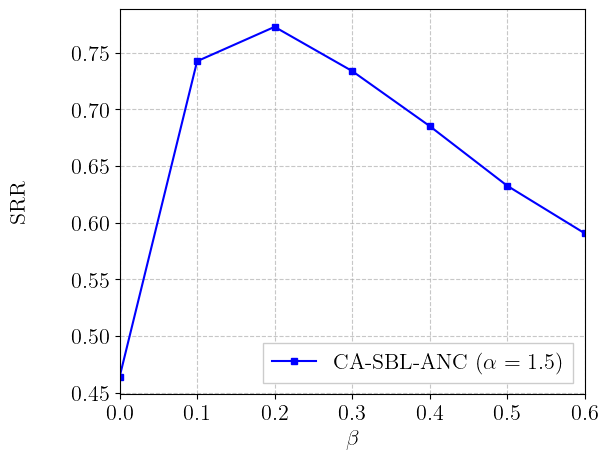

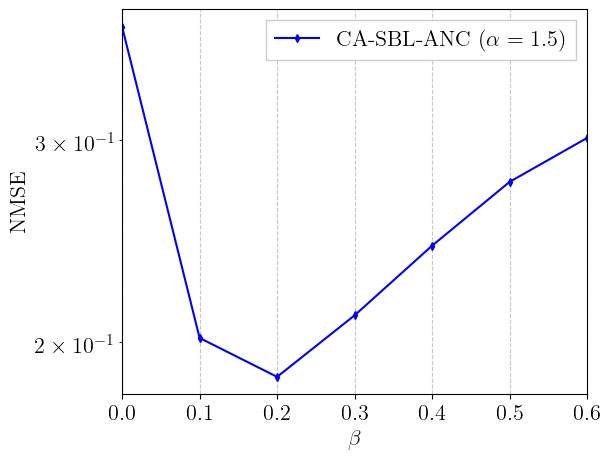

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-100-sbl-pilot-length-all-snr-db-12.npz", allow_pickle=True)

#sbl_avg_hit_rate = data["avg_hit_rate_sbl"][1]
#sbl_avg_support_recovery_rate = data["avg_support_recovery_rate_sbl"][1]
#sbl_avg_false_alarm_rate = data["avg_false_alarm_rate_sbl"][1]
#sbl_avg_norm_mse = data["avg_norm_mse_sbl"][1]

# Load data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-1-5-beta-all-snr-db-12-pilot-length-15.npz", allow_pickle=True)
avg_hit_rate_casbl = data["avg_hit_rate_casbl"]
avg_support_recovery_rate_casbl = data["avg_support_recovery_rate_casbl"]
avg_false_alarm_rate_casbl = data["avg_false_alarm_rate_casbl"]
avg_norm_mse_casbl = data["avg_norm_mse_casbl"]
pilot_length = data["pilot_length"]
snr_db = data["snr_db"]
beta_array = data["beta_array"]
alpha = data["alpha"]

# Define the SNR values for x-axis
beta_values = beta_array

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Set global parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,  # Font size for axis labels
    'axes.titlesize': 16,  # Font size for plot titles (if used)
    'xtick.labelsize': 16,  # Font size for x-axis tick labels
    'ytick.labelsize': 16,  # Font size for y-axis tick labels
    'legend.fontsize': 16,  # Font size for legend
    'grid.linestyle': '--',  # Dashed grid style
    'grid.alpha': 0.7,  # Grid transparency
})

# Plot Support Recovery Rate
plt.figure(figsize=(6, 5))
plt.plot(beta_values, avg_support_recovery_rate_casbl, marker='s', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\alpha=1.5)$', markersize=4)
plt.xlim(min(beta_values), max(beta_values))
plt.xlabel(r'$\beta$')
plt.ylabel(r'SRR', labelpad=30)
plt.grid(True)
plt.legend(loc='lower right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Beta_Optimization_SRR.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot Normalized MSE
plt.figure(figsize=(6, 5))
plt.plot(beta_values, avg_norm_mse_casbl, marker='d', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\alpha=1.5)$', markersize=4)
plt.xlim(min(beta_values), max(beta_values))
plt.xlabel(r'$\beta$')
plt.ylabel(r'NMSE')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend(loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Beta_Optimization_NMSE.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


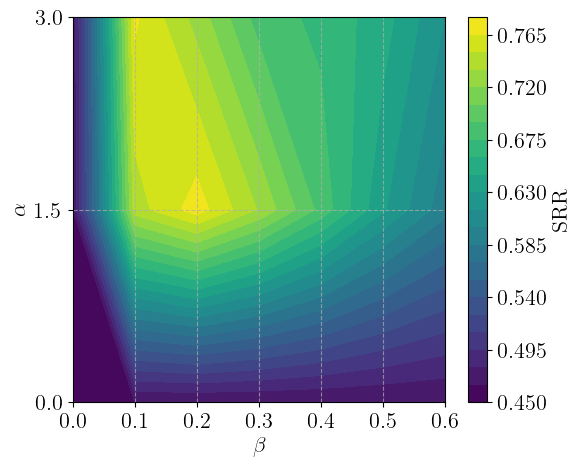

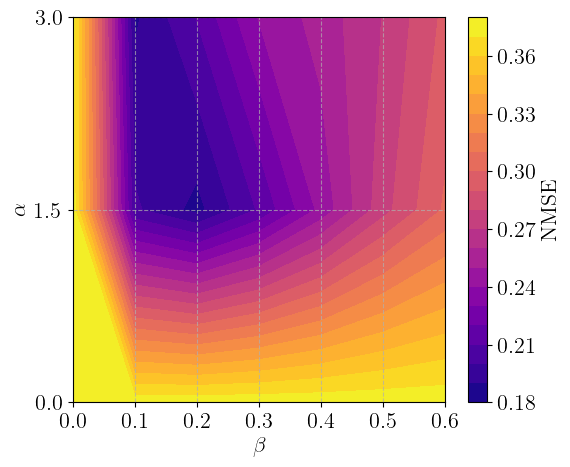

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# File paths (modify this list to include all files with different alpha values)
file_paths = [
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-0-0-beta-all-snr-db-12-pilot-length-15.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-1-5-beta-all-snr-db-12-pilot-length-15.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-3-0-beta-all-snr-db-12-pilot-length-15.npz",
    # Add more file paths as needed
]

# Initialize lists
alpha_values = []
beta_values = None
srr_values = []
nmse_values = []

# Load data from all files
for file_path in file_paths:
    data = np.load(file_path, allow_pickle=True)
    alpha = data["alpha"]
    beta_array = data["beta_array"]
    avg_srr = data["avg_support_recovery_rate_casbl"]
    avg_nmse = data["avg_norm_mse_casbl"]

    alpha_values.append(alpha)
    if beta_values is None:
        beta_values = beta_array  # Set beta values once (assuming same for all)

    srr_values.append(avg_srr)
    nmse_values.append(avg_nmse)

# Convert lists to numpy arrays
alpha_values = np.array(alpha_values)
beta_values = np.array(beta_values)
srr_values = np.array(srr_values)
nmse_values = np.array(nmse_values)

# Create meshgrid
BETA, ALPHA = np.meshgrid(beta_values, alpha_values)

# Set global parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot Support Recovery Rate (SRR) Contour
plt.figure(figsize=(6, 5))
contour_srr = plt.contourf(BETA, ALPHA, srr_values, levels=20, cmap='viridis')
plt.colorbar(contour_srr, label='SRR')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.xticks(beta_values)  # Set x-ticks to beta values
plt.yticks(alpha_values)  # Set y-ticks to alpha values
plt.grid(True)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Beta_Alpha_SRR_Contour.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot Normalized MSE (NMSE) Contour
plt.figure(figsize=(6, 5))
contour_nmse = plt.contourf(BETA, ALPHA, nmse_values, levels=20, cmap='plasma')
plt.colorbar(contour_nmse, label='NMSE')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.xticks(beta_values)  # Set x-ticks to beta values
plt.yticks(alpha_values)  # Set y-ticks to alpha values
plt.grid(True)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Beta_Alpha_NMSE_Contour.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


Results CA-SBL

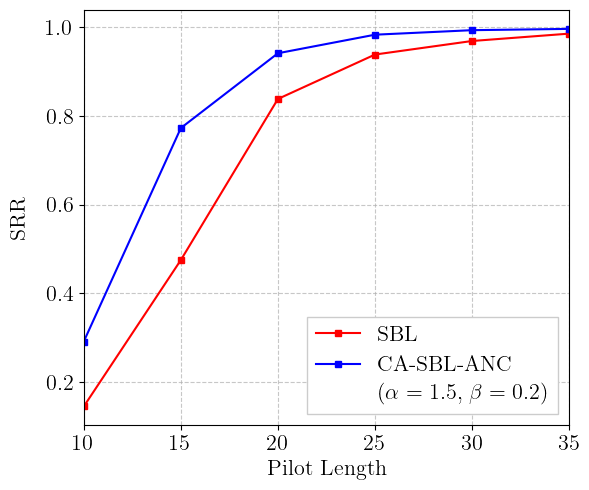

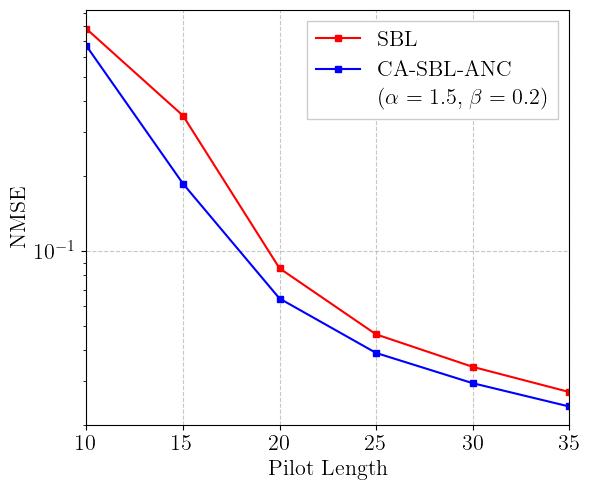

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_paths = {
    r'SBL': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-sbl-snr-db-12-pilot-length-all.npz",
    r'\begin{flushleft} CA-SBL-ANC \\ ($\alpha=1.5$, $\beta=0.2$) \end{flushleft}': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-1-5-beta-0-2-snr-db-12-pilot-length-all.npz",
}

colors = ['r', 'b']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    data = np.load(path, allow_pickle=True)
    datasets[label] = {key: data[key] for key in keys}

# Define pilot length values
pilot_length_values = pilot_length_array

# Update plot settings
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot SRR vs Pilot Length
plt.figure(figsize=(6, 5))
for i, (label, color) in enumerate(zip(file_paths.keys(), colors)):
    metric = datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl']
    plt.plot(pilot_length_values, metric, marker='s', linestyle='-', color=color, label=label, markersize=4)
plt.xlim(min(pilot_length_values), max(pilot_length_values))
plt.xticks(pilot_length_values)
plt.xlabel('Pilot Length')
plt.ylabel('SRR', labelpad=12)
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.show()

# Plot NMSE vs Pilot Length
plt.figure(figsize=(6, 5))
for i, (label, color) in enumerate(zip(file_paths.keys(), colors)):
    metric = datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl']
    plt.plot(pilot_length_values, metric, marker='s', linestyle='-', color=color, label=label, markersize=4)
plt.xlim(min(pilot_length_values), max(pilot_length_values))
plt.xticks(pilot_length_values)
plt.xlabel('Pilot Length')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.show()

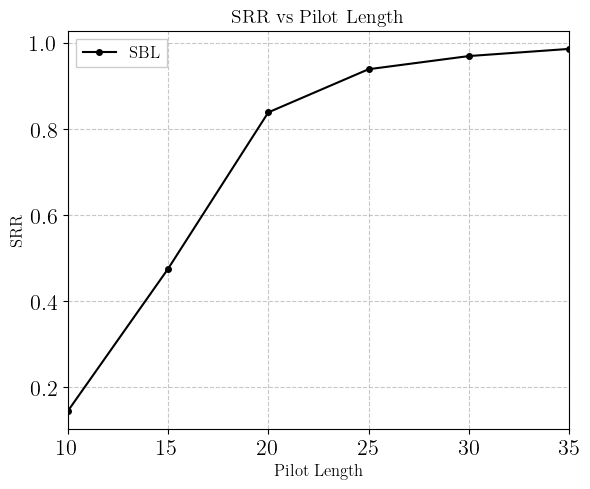

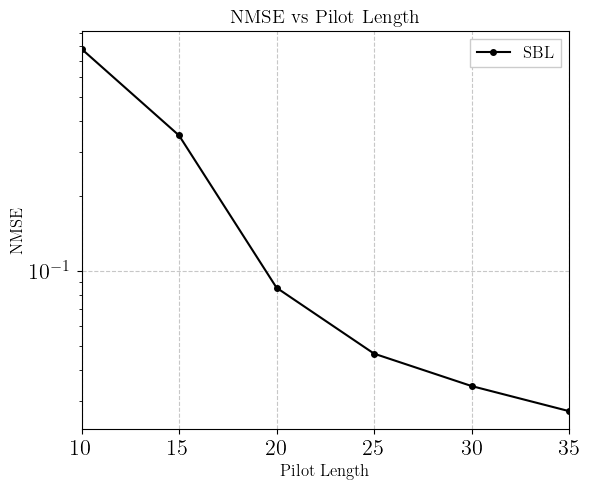

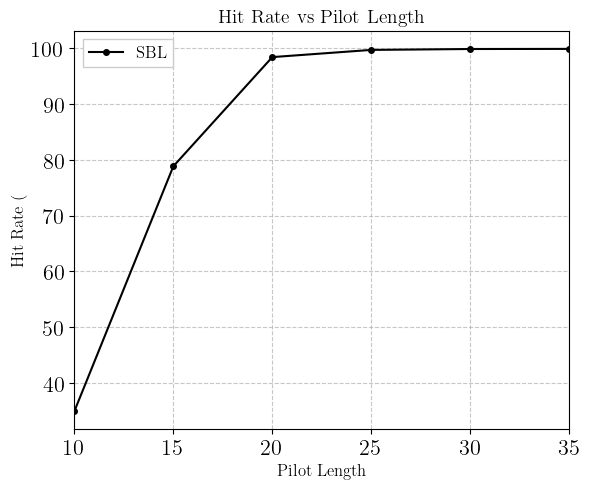

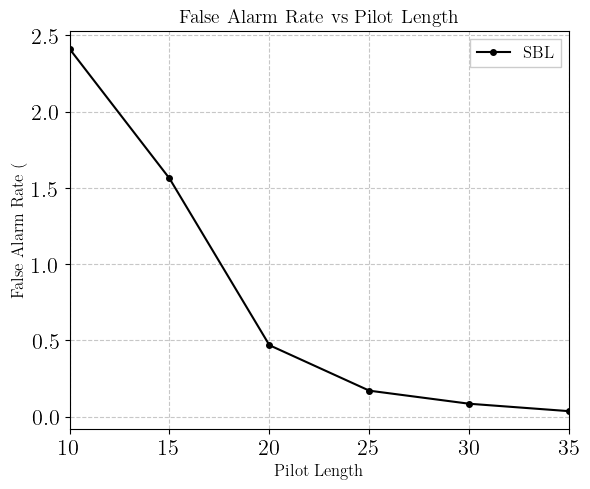

In [8]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(pilot_length_values), max(pilot_length_values))
    plt.xticks(pilot_length_values)
    plt.xlabel('Pilot Length', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-sbl-snr-db-12-pilot-length-all.npz",
    }

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)


In [9]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(snr_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(snr_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(snr_values), max(snr_values))
    plt.xticks(snr_values)
    plt.xlabel('SNR (dB)', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=0.1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-1-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=0.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-5-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-1-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=2, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=2.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-5-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=3, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-3-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-5-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=10, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-10-0-beta-0-2-snr-db-all-pilot-length-20.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define SNR values
snr_values = snr_db_array

# Plot different metrics
plot_metric(snr_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs SNR', 'SRR', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs SNR', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(snr_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs SNR', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs SNR', 'False Alarm Rate (%)', markers, colors, linestyles)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz'

In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(pilot_length_values), max(pilot_length_values))
    plt.xticks(pilot_length_values)
    plt.xlabel('Pilot Length', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=0.1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-1-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=0.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-5-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-1-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=2, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=2.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-5-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=3, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-3-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-5-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=10, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-10-0-beta-0-2-pilot-length-all-snr-db-12.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)


In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(snr_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(snr_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(snr_values), max(snr_values))
    plt.xticks(snr_values)
    plt.xlabel('SNR (dB)', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=0.1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-0-1-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-1-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-2-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=-0.5)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-N0-5-snr-db-all-pilot-length-20.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define SNR values
snr_values = snr_db_array

# Plot different metrics
plot_metric(snr_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs SNR', 'SRR', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs SNR', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(snr_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs SNR', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs SNR', 'False Alarm Rate (%)', markers, colors, linestyles)


In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(pilot_length_values), max(pilot_length_values))
    plt.xticks(pilot_length_values)
    plt.xlabel('Pilot Length', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=0.1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-0-1-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-1-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-2-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=-0.5)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-N0-5-pilot-length-all-snr-db-12.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)
